In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

regSeason = pd.read_csv("./data/MRegularSeasonDetailedResults.csv")
tournRes = pd.read_csv("./data/MNCAATourneyCompactResults.csv")

statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF", "Score"]
statsMeasured = ["AVG" + stat for stat in statsToMeasure]
statsMeasured = statsMeasured + ["O" + stat for stat in statsMeasured]
statsMeasured = statsMeasured + ["RAT" + stat for stat in statsToMeasure]

seasonStats = {}
seasonStats["Season"] = [0]
seasonStats["TeamID"] = [0]
seasonStats["GamesWon"] = [0]
seasonStats["HighDay"] = [0]
for stat in statsMeasured:
    seasonStats[stat] = [0]

seasonStats["AVGEFG"] = 0
seasonStats["OAVGEFG"] = 0
seasonStats["RATEFG"] = 0

seasonStats = pd.DataFrame(seasonStats)

teams = regSeason["WTeamID"].unique()
seasons = regSeason["Season"].unique()
        
for team in teams:
    teamStats = regSeason.loc[(regSeason["WTeamID"] == team) | (regSeason["LTeamID"] == team)]
    
    currTeamTournRes = tournRes.loc[(tournRes["WTeamID"] == team) | (tournRes["LTeamID"] == team)]
    currTeamTournResHighDay = currTeamTournRes.groupby("Season").max("DayNum")
    currTeamTournResHighDay = currTeamTournResHighDay.reset_index()
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 134) & (currTeamTournResHighDay["DayNum"] <= 135), "DayNum"] = 0
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 136) & (currTeamTournResHighDay["DayNum"] <= 137), "DayNum"] = 1
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 138) & (currTeamTournResHighDay["DayNum"] <= 139), "DayNum"] = 2
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 143) & (currTeamTournResHighDay["DayNum"] <= 144), "DayNum"] = 3
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 145) & (currTeamTournResHighDay["DayNum"] <= 146), "DayNum"] = 4
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 152) & (currTeamTournResHighDay["DayNum"] <= 152), "DayNum"] = 5
    currTeamTournResHighDay.loc[(currTeamTournResHighDay["DayNum"] >= 154) & (currTeamTournResHighDay["DayNum"] <= 154), "DayNum"] = 6

    for season in seasons:
        seasonGames = teamStats.loc[teamStats["Season"] == season]
        wonGames = seasonGames.loc[seasonGames["WTeamID"] == team]
        lostGames = seasonGames.loc[seasonGames["LTeamID"] == team]
        GamesWon = len(wonGames)
        
        newStats = {}
        newStats["Season"] = season
        newStats["TeamID"] = team
        newStats["GamesWon"] = GamesWon
        
        if (len(currTeamTournResHighDay.loc[currTeamTournResHighDay["Season"] == season])):
            newStats["HighDay"] = int(currTeamTournResHighDay.loc[currTeamTournResHighDay["Season"] == season]["DayNum"])
        else:
            newStats["HighDay"] = -1
            
           
        
        for stat in statsToMeasure:
            winString = "W" + stat
            loseString = "L" + stat
            totStat =  wonGames[winString].sum() + lostGames[loseString].sum()
            OtotStat = wonGames[loseString].sum() + lostGames[winString].sum()
            
            if (len(seasonGames)):
                avgStat = totStat / len(seasonGames)
                OavgStat = OtotStat / len(seasonGames)
                if (avgStat and OavgStat): 
                    ratStat = avgStat/OavgStat
                else:
                    ratStat = -1
            else:
                avgStat = -1
                OavgStat = -1
                ratStat = -1
            
            if (wonGames["WFGA"].sum() + lostGames["LFGA"].sum()):
                newStats["AVGEFG"] = (((wonGames["WFGM"].sum() + lostGames["LFGM"].sum()) \
                                      - (wonGames["WFGM3"].sum() + lostGames["LFGM3"].sum())) \
                                      + 0.5 * (wonGames["WFGM3"].sum() + lostGames["LFGM3"].sum())) \
                                      / (wonGames["WFGA"].sum() + lostGames["LFGA"].sum() )
                newStats["OAVGEFG"] = (((wonGames["LFGM"].sum() + lostGames["WFGM"].sum()) \
                                      - (wonGames["LFGM3"].sum() + lostGames["WFGM3"].sum())) \
                                      + 0.5 * (wonGames["LFGM3"].sum() + lostGames["WFGM3"].sum())) \
                                      / (wonGames["LFGA"].sum() + lostGames["WFGA"].sum() )
                newStats["RATEFG"] = newStats["AVGEFG"]/newStats["OAVGEFG"]
            else:
                newStats["AVGEFG"] = -1
                newStats["OAVGEFG"] = -1
            
            newStats["AVG" + stat] = avgStat
            newStats["OAVG" + stat] = OavgStat
            newStats["RAT" + stat] = ratStat
        newStats = pd.DataFrame([newStats])
        seasonStats = pd.concat([seasonStats, newStats], ignore_index=True)

In [3]:
seasonStats.sample(5)

Season  TeamID  GamesWon  HighDay     AVGFGM     AVGFGA   AVGFGM3  \
3350    2013    1356        13       -1  23.066667  52.733333  4.466667   
766     2012    1150        13       -1  23.100000  56.133333  6.400000   
4673    2013    1369        15       -1  26.064516  56.387097  7.741935   
1664    2007    1379        16       -1  22.740741  54.111111  4.666667   
4744    2021    1201        10       -1  22.454545  53.045455  6.863636   

        AVGFGA3     AVGFTM     AVGFTA  ...     RATDR    RATAst     RATTO  \
3350  14.066667  11.533333  17.966667  ...  0.850440  0.766667  0.803493   
766   19.666667  14.400000  21.866667  ...  0.949936  0.958435  0.970046   
4673  19.709677  13.064516  18.806452  ...  1.118280  1.244216  1.222222   
1664  13.481481  17.370370  26.333333  ...  1.090909  1.022140  1.015625   
4744  21.045455  13.045455  19.500000  ...  0.995935  0.922131  1.155303   

        RATStl    RATBlk     RATPF  RATScore    AVGEFG   OAVGEFG    RATEFG  
3350  1.311111  0.790123  1.025048  0.952478  0.395070  0.401191  0.984741  
766   1.221106  0.685484  0.990958  0.972894  0.354513  0.364737  0.971969  
4673  0.798995  1.403670  1.098672  1.007576  0.393593  0.355099  1.108403  
1664  1.024096  0.590909  0.927973  1.049511  0.377139  0.356988  1.056446  
4744  0.971831  0.791667  0.995516  0.946879  0.358612  0.380085  0.943505  

[5 rows x 49 columns]

In [5]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

df = seasonStats

statsToMeasure = ["Score","FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF", "EFG"]
averageStats = ["AVG" + stat for stat in statsToMeasure]
oAverageStats = ["O" + stat for stat in averageStats]
ratStats = ["RAT" + stat for stat in statsToMeasure]

allStats = averageStats + oAverageStats + ratStats

teams = df["TeamID"].unique()
seasons = df["Season"].unique()

seasons = np.arange(2003,2024)

predictedWins = np.zeros(len(seasons))
coeffs = pd.DataFrame(columns = ratStats)


for i, season in enumerate(seasons):
    seasonStatsMod = df.loc[df["AVGFGA3"] != 0]
    seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["Season"] == season]
    seasonStatsMod = seasonStatsMod.loc[df["AVGFGA3"] != -1]
    # seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
    X = seasonStatsMod[ratStats].to_numpy()
    # X = StandardScaler().fit_transform(X)
    y = seasonStatsMod["GamesWon"].to_numpy()
    
    reg = linear_model.LassoCV(cv=5, random_state=0, max_iter = 1000000).fit(X, y)
    
    Duke = df.loc[df["TeamID"] == 1181]
    Duke = Duke.loc[Duke["Season"] == season]
    Duke = Duke[ratStats].to_numpy()
    predictedWins[i] = reg.predict(Duke)
    
    coeffs.loc[len(coeffs)] = reg.coef_
    #print(reg.score(X, y))

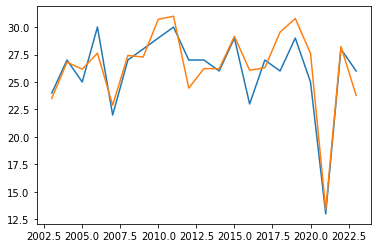

In [6]:
actualWins = seasonStats.loc[seasonStats["TeamID"] == 1181, "GamesWon"]
plt.plot(seasons, actualWins)
plt.plot(seasons, predictedWins)

In [7]:
coeffs

RATScore     RATFGM     RATFGA   RATFGM3   RATFGA3    RATFTM    RATFTA  \
0   27.171348   0.000000  -0.000000  4.773062 -1.749349  0.553740  3.364339   
1   40.836241   4.019626   0.000000  0.000000  0.000000  4.523451  0.000000   
2   44.380449   0.053596   0.000000  0.553079  0.000000  2.612362  0.000000   
3   38.386723   0.532647  -0.000000  2.200283  0.000000  3.083731  0.000000   
4   48.029270   0.000000   0.000000  0.000000 -0.000000  2.957938  0.000000   
5   33.497824   0.000000  -0.000000  5.218714 -5.373548  0.461120  1.062672   
6   42.454307   0.000000 -15.276445  2.554245 -0.784325  1.655534  0.645010   
7   52.967447   1.581762   0.000000  0.000000  0.000000  1.837382  1.589650   
8   52.053889   0.000000  -0.000000  0.683315 -0.000000  2.270223  0.574995   
9   50.057094   1.744382   0.000000  1.044334 -0.000000  0.000000  4.159457   
10  49.561130   0.000000   0.000000  0.180916  0.000000  2.699474  0.000000   
11  46.871461   0.000000  -0.000000  1.425726 -0.000000  2.109193  1.500341   
12  52.711103   0.000000  -0.000000  0.667545 -0.816797  2.189732  0.000000   
13  13.653344  10.667540  -0.000000  8.062772 -2.315684  4.304621  3.056345   
14  33.185075   0.000000   0.000000  2.241809 -0.000000  1.737427  3.016019   
15  44.055671   0.505052  -0.000000  2.651520 -0.000000  2.449175  0.807921   
16  48.688733   0.000000 -13.897431  1.717726 -1.270588  0.000000  0.000000   
17  47.765670   3.403410   0.000000  0.916130  0.000000  3.386590  0.299577   
18  36.755289   2.478429  -0.000000  0.000000 -0.000000  3.280310  0.000000   
19  47.600696   0.000000  -0.000000  1.054504 -0.000000  3.257697  0.000000   
20  39.002131   0.000000  -0.000000  4.525993 -0.000000  3.729346  0.587239   

       RATOR      RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF  \
0  -0.000000  14.225326 -0.000000 -7.040811  1.513854  0.465547 -0.540910   
1  -0.000000   1.859335  0.972219 -2.393174  0.080327  0.507580  0.000000   
2   0.096033   2.770784  1.191029 -1.111970  1.414478  0.300268  0.000000   
3   0.000000   5.295091  0.324295 -5.470088  0.125938  0.075511 -0.000000   
4   0.000000   0.000000  1.840368 -1.188892  0.000000  0.261702 -0.000000   
5  -0.315672  10.772767  1.943269 -6.461561  1.528944  0.153549 -2.751509   
6   4.358261   3.143073 -0.000000 -8.719280  0.267663  0.577464  1.465022   
7   0.000000   0.000000  1.495235 -0.272379  0.000000  0.000000 -0.000000   
8   0.000000   3.237636  0.000000 -0.000000  0.000000  0.339306 -0.000000   
9   0.000000   1.355669  0.000000 -0.000000  0.935470  0.331758  0.000000   
10  0.000000   0.000000  0.000000 -0.000000  0.477811  0.776032 -0.000000   
11 -0.000000   6.070037 -0.000000 -4.240954  0.000000  0.183159 -0.000000   
12 -0.403574   0.000000  0.532594 -1.512771 -0.000000 -0.000000 -1.733388   
13  1.173136   6.149920 -0.748019 -5.899267  1.432179  0.763256 -0.700576   
14  0.122397  13.750829  0.906719 -6.644313  1.012677  0.822296 -0.000000   
15  0.000000   2.591345  0.959120 -3.203025  0.768314  0.405440 -0.577040   
16  3.783326   4.367711 -0.073257 -6.294891  1.410066  0.789061 -1.338778   
17  0.061361   0.000000  0.262136 -0.047568  0.394047  0.309192 -0.000000   
18  0.000000   0.390381  0.000000 -0.000000  0.833348  0.551144  0.000000   
19 -0.268528   6.407916  0.382129 -2.738178  0.712579  0.237185 -0.904069   
20  0.000000   2.747791  0.158001 -1.182774  2.513857 -0.000000  0.000000   

       RATEFG  
0    1.946566  
1    0.000000  
2    0.000000  
3    4.028804  
4    0.000000  
5   -0.000000  
6    3.615644  
7    0.000000  
8    0.000000  
9    0.000000  
10   2.087535  
11   2.606892  
12   0.000000  
13  11.920902  
14   0.000000  
15   4.800515  
16   0.551483  
17   2.206359  
18   0.000000  
19   0.000000  
20  11.403397

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint

# All of the stats we have data for
statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]

# All of the ratio stats
ratStats = ["RAT" + stat for stat in statsToMeasure]

df = seasonStats

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1)] 
df = df.loc[df["AVGFGA"] != -1]

x = df.loc[:, ratStats].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])

df.reset_index(inplace=True)

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

# principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <= 5), "GamesWon"] = 5
# principalDf.loc[(principalDf["GamesWon"] >= 6) & (principalDf["GamesWon"] <=10), "GamesWon"] = 10
# principalDf.loc[(principalDf["GamesWon"] >= 11) & (principalDf["GamesWon"] <=15), "GamesWon"] = 15
# principalDf.loc[(principalDf["GamesWon"] >= 16) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
# principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <=25), "GamesWon"] = 25
# principalDf.loc[(principalDf["GamesWon"] >= 26) & (principalDf["GamesWon"] <= 30), "GamesWon"] = 30
# principalDf.loc[(principalDf["GamesWon"] >= 31) & (principalDf["GamesWon"] <= 35), "GamesWon"] = 35
# principalDf.loc[(principalDf["GamesWon"] >= 36) , "GamesWon"] = 40
bins = [-1, 5, 10, 15, 20, 25, 30, 35]
principalDf["GamesWon"] = pd.cut(principalDf["GamesWon"], bins=bins, labels=bins[1:])

print("PCA 1:")
for combo in zip(pca.components_[0], ratStats):
    print(f"{combo[1]:} {combo[0]}")
 
print()

print("PCA 2:")
for combo in zip(pca.components_[1], ratStats):
    print(f"{combo[1]:} {combo[0]}")


PCA 1:
RATFGM 0.3614927569864815
RATFGA -0.026698959615792835
RATFGM3 0.08751548246535942
RATFGA3 -0.043917290461253256
RATFTM 0.405749339956424
RATFTA 0.4034997316432839
RATOR 0.14028068226807197
RATDR 0.39153172375590944
RATAst 0.3526977637062892
RATTO -0.1535168452570969
RATStl 0.155385040325371
RATBlk 0.23711996713043856
RATPF -0.36092744343293187

PCA 2:
RATFGM 0.2703743145396357
RATFGA 0.4664481828662136
RATFGM3 0.3063655791141607
RATFGA3 0.31844645934370475
RATFTM -0.208459944121426
RATFTA -0.22437659829086573
RATOR 0.14950453346130654
RATDR -0.13644028432595143
RATAst 0.20100130323539592
RATTO -0.3900971462274214
RATStl 0.3665643018257852
RATBlk 0.017120864020617695
RATPF 0.22814036375107208


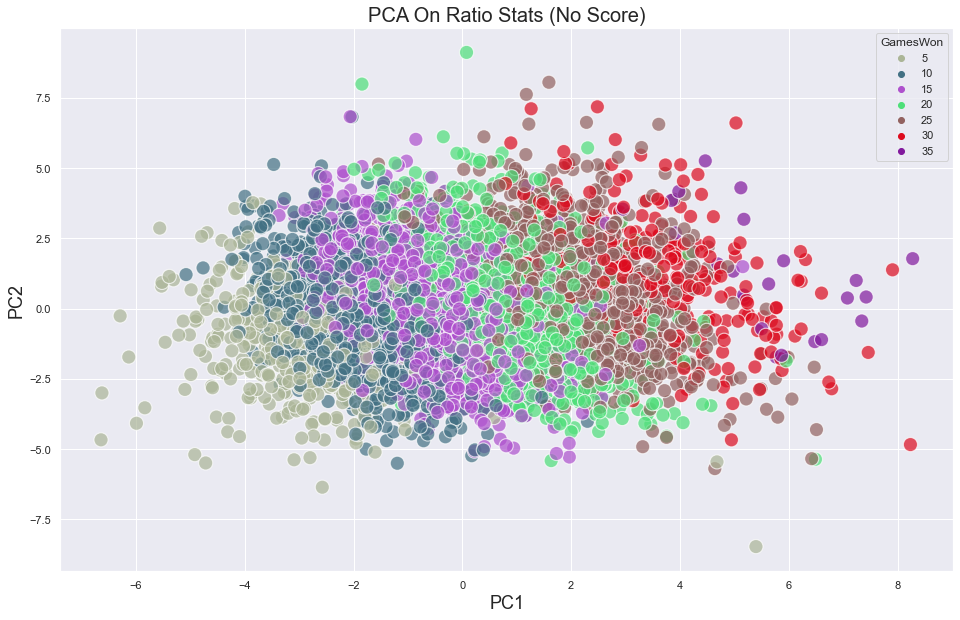

In [37]:
import random
colors = []
n = 7
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(16,10)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc2", hue="GamesWon", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=18)
ax.set_ylabel("PC2", size=18)
ax.set_title("PCA On Ratio Stats (No Score)", size = 20)

plt.savefig("./plots/pca.png",dpi=200)

plt.show()

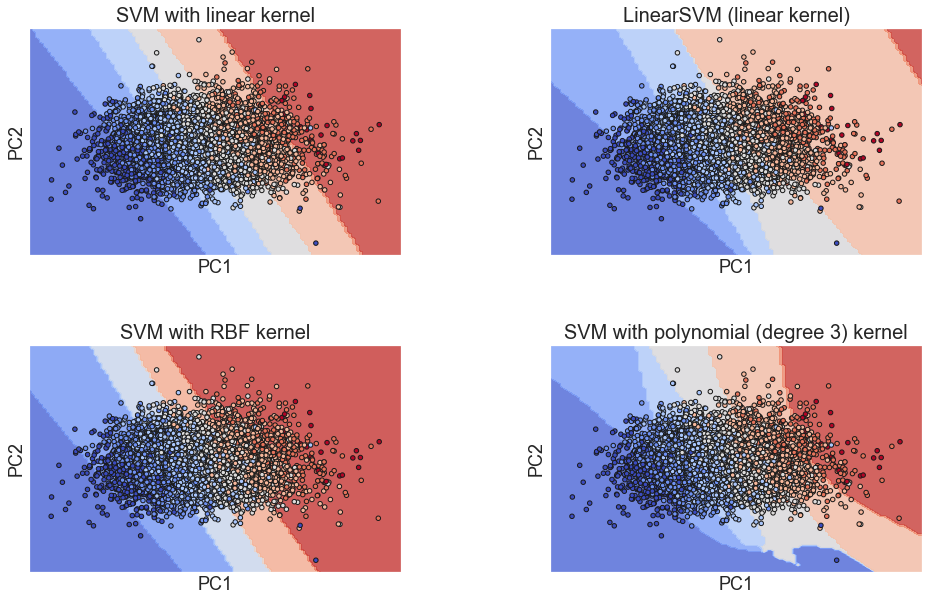

In [45]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# Take the first two features. We could avoid this by using a two-dim dataset
X = np.array(principalDf[["pc1", "pc2"]])
y = np.array(principalDf["GamesWon"])

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1 # SVM regularization parameter
models = [
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.001, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
]

models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = [
    "SVM with linear kernel",
    "LinearSVM (linear kernel)",
    "SVM with RBF kernel",
    "SVM with polynomial (degree 3) kernel",
]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="pc1",
        ylabel="pc2",
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel("PC1", size = 18)
    ax.set_ylabel("PC2", size = 18)
    ax.set_title(title, size = 20)

plt.savefig("./plots/svm.png")
plt.show()

In [49]:
models[0].classes_

array([ 5, 10, 15, 20, 25, 30, 35])

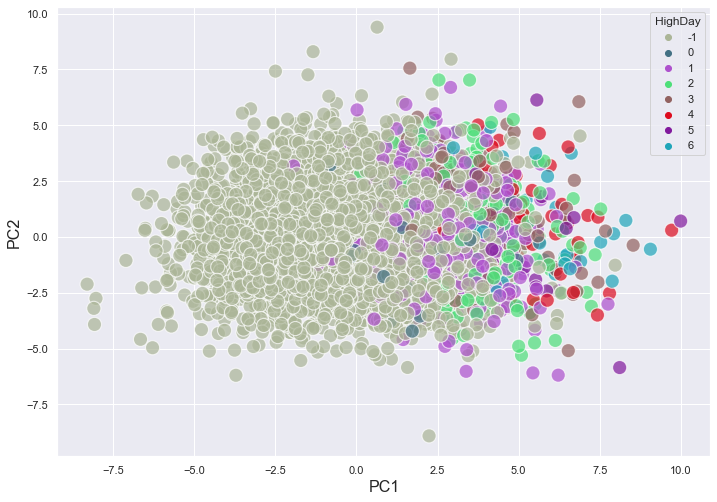

In [61]:
import random

principalDf = principalDf.loc[(principalDf["HighDay"] < 100) & (principalDf["HighDay"] >= -1)]

colors = []
n = 8
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc2", hue="HighDay", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC2", size=16)

plt.savefig("./plots/pca.png",dpi=200)

plt.show()

In [30]:
seasonStats.sort_values(by="AVGEFG", ascending=False)

Season  TeamID  GamesWon  HighDay     AVGFGM     AVGFGA   AVGFGM3  \
1006    2021    1211        26        6  34.153846  62.000000  7.307692   
2817    2005    1429        24        1  26.806452  50.516129  5.741935   
6361    2021    1372        13       -1  28.444444  55.611111  4.277778   
1430    2004    1329        26        5  28.896552  56.344828  4.827586   
1727    2007    1394        24        1  27.633333  52.733333  5.766667   
...      ...     ...       ...      ...        ...        ...       ...   
4072    2021    1147         0       -1  -1.000000  -1.000000 -1.000000   
4071    2020    1147         0       -1  -1.000000  -1.000000 -1.000000   
4070    2019    1147         0       -1  -1.000000  -1.000000 -1.000000   
4069    2018    1147         0       -1  -1.000000  -1.000000 -1.000000   
7124    2007    1167         0       -1  -1.000000  -1.000000 -1.000000   

        AVGFGA3     AVGFTM     AVGFTA  ...     RATDR    RATAst     RATTO  \
1006  20.038462  16.500000  22.730769  ...  1.305709  1.597315  0.824468   
2817  14.645161  13.612903  19.645161  ...  1.432836  1.689873  1.010526   
6361  13.277778  16.611111  24.444444  ...  1.207951  1.110638  0.957792   
1430  12.758621  15.586207  22.413793  ...  1.227671  1.323864  0.864745   
1727  14.300000  18.133333  25.200000  ...  1.327839  1.315403  1.060475   
...         ...        ...        ...  ...       ...       ...       ...   
4072  -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   
4071  -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   
4070  -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   
4069  -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   
7124  -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   

        RATStl    RATBlk     RATPF  RATScore    AVGEFG   OAVGEFG    RATEFG  
1006  1.384615  0.986667  0.823009  1.332777  0.491935  0.362492  1.357093  
2817  0.878173  1.034884  0.798872  1.269360  0.473819  0.337522  1.403814  
6361  1.223022  1.033898  0.830769  1.096319  0.473027  0.391146  1.209337  
1430  1.310345  1.155556  0.954237  1.223961  0.470012  0.369361  1.272501  
1727  0.973684  0.988095  0.909236  1.123463  0.469343  0.370149  1.267982  
...        ...       ...       ...       ...       ...       ...       ...  
4072 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000       NaN  
4071 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000       NaN  
4070 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000       NaN  
4069 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000       NaN  
7124 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000       NaN  

[7729 rows x 49 columns]

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint

df = seasonStats

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1)] 
df = df[df["AVGFGA"] != -1]

selected = ratStats.copy()
selected.remove("RATFGA")
selected.remove("RATFGM")
selected.remove("RATFGA3")
selected.remove("RATFGM3")
x = df.loc[:, selected].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])


df.reset_index(inplace=True)

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]


bins = [-1, 5, 10, 15, 20, 25, 30, 35]
principalDf["GamesWon"] = pd.cut(principalDf["GamesWon"], bins=bins, labels=bins[1:])

print("PCA 1:")
for combo in zip(pca.components_[0], selected):
    print(f"{combo[1]:} {combo[0]}")
 
print()

print("PCA 2:")
for combo in zip(pca.components_[1], selected):
    print(f"{combo[1]:} {combo[0]}")


PCA 1:
RATFTM 0.4209163700467382
RATFTA 0.42218265914626696
RATOR 0.1073874030340733
RATDR 0.40873315555024536
RATAst 0.3096215265557729
RATTO -0.07908025449663258
RATStl 0.0877522077644231
RATBlk 0.2342843659018778
RATPF -0.3804120915654782
RATEFG 0.39569459830230724

PCA 2:
RATFTM -0.062157830976519966
RATFTA -0.07469337535883494
RATOR 0.08933719840003207
RATDR -0.2182346952163326
RATAst 0.1933199185124113
RATTO -0.6691057484103858
RATStl 0.6600629098961421
RATBlk 0.014420613542878581
RATPF 0.11667475533413452
RATEFG 0.01925345201259563


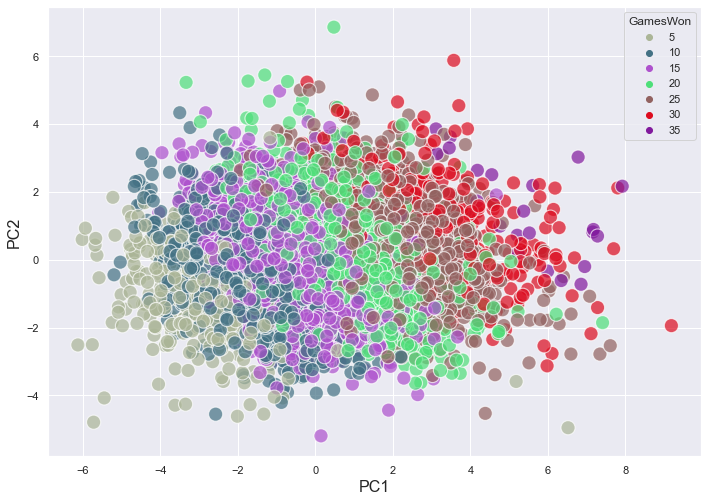

In [32]:
import random
colors = []
n = 7
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc2", hue="GamesWon", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC2", size=16)

plt.savefig("./plots/pca.png",dpi=200)

plt.show()

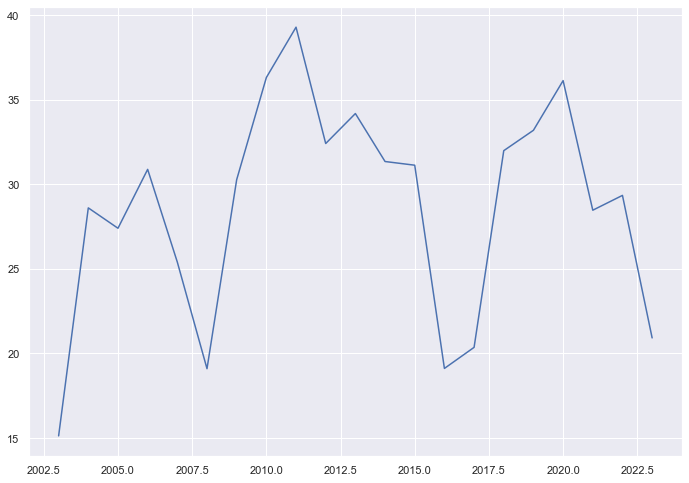

In [33]:
fig, ax = plt.subplots()

ax.plot(seasons, coeffs["RATFGM"])

plt.show()

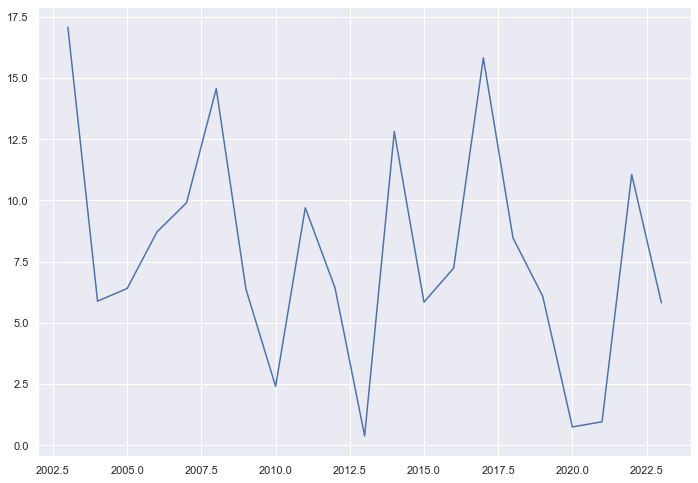

In [34]:
fig, ax = plt.subplots()

ax.plot(seasons, coeffs["RATDR"])

plt.show()

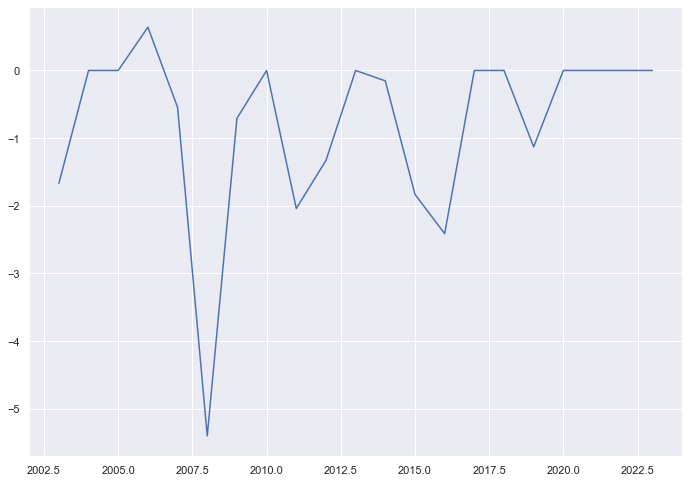

In [35]:
fig, ax = plt.subplots()

ax.plot(seasons, coeffs["RATFGA3"])

plt.show()

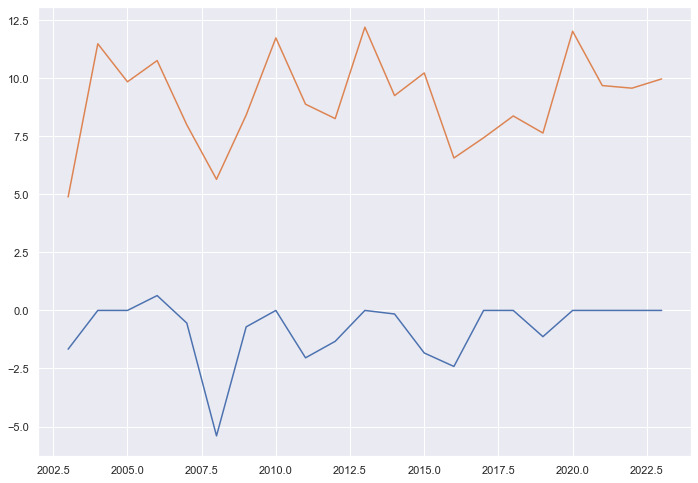

In [36]:
fig, ax = plt.subplots()

ax.plot(seasons, coeffs["RATFGA3"])
ax.plot(seasons, coeffs["RATFTM"])

plt.show()

In [87]:
import pysindy as ps

In [107]:
t = np.linspace(0,21,21)

x = coeffs["RATFGA3"]
y = coeffs["RATFTM"]
z = coeffs["RATFGM3"]
X = np.stack([x, y, z], axis=-1) 


fourier_library = ps.FourierLibrary(n_frequencies=1)
polynomial_library = ps.PolynomialLibrary(degree=2)
feature_library = ps.ConcatLibrary([fourier_library, polynomial_library])

frols = ps.optimizers.frols.FROLS()

optimizer = ps.optimizers.EnsembleOptimizer(opt = frols, bagging=True, library_ensemble=True, n_models=20, n_candidates_to_drop=1)


model = ps.SINDy(feature_names=coeffs.columns, feature_library=feature_library)
model.fit(coeffs, t=t)
model.print()

(RATScore)' = 0.426 RATScore RATFGA3 + 4.431 RATFGM RATFGM3 + 2.456 RATFGM RATAst + 0.270 RATFGM RATTO + -2.919 RATFGM RATEFG + 1.710 RATFGM3^2 + -1.295 RATFGM3 RATDR + -2.699 RATFGM3 RATTO + -0.532 RATFTA^2 + 0.662 RATDR RATEFG + 1.707 RATAst RATEFG + 0.219 RATTO^2 + 1.776 RATTO RATEFG + -0.390 RATEFG^2
(RATFGM)' = 0.000
(RATFGA)' = 0.000
(RATFGM3)' = 0.000
(RATFGA3)' = 0.000
(RATFTM)' = 0.000
(RATFTA)' = 0.000
(RATOR)' = 0.000
(RATDR)' = 1.214 cos(1 RATDR) + 5.213 RATFGM RATFGM3 + -3.564 RATFGM RATDR + -1.648 RATFGM RATAst + -2.714 RATFGM RATTO + 0.810 RATFGM RATStl + -2.991 RATFGM RATEFG + -0.454 RATFGA3^2 + 0.319 RATFTM^2 + 0.683 RATFTM RATTO + -0.395 RATFTA RATDR + 0.958 RATDR RATAst + -0.269 RATDR RATTO + -1.053 RATDR RATStl
(RATAst)' = 0.000
(RATTO)' = 0.000
(RATStl)' = 0.000
(RATBlk)' = 0.000
(RATPF)' = 0.000
(RATEFG)' = 0.000


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(


In [105]:
preds = model.simulate([x[0], y[0], z[0]],t)

fig, ax = plt.subplots()

ax.plot(t, preds[:,0], "--o")
ax.plot(t, preds[:,1], "--o")
ax.plot(t, coeffs["RATFGA3"])
ax.plot(t, coeffs["RATFTM"])

plt.legend(["RATFGA3 sindy", "RATFTM sindy", "RATFGA3", "RATFTM"])

plt.show()

preds

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.4067306349816D-01   r2 =  0.3307126987234D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.4067306349816D-01   r2 =  0.3307126987234D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.4067306349816D-01   r2 =  0.3307126987234D-17
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.4067306349816D-01   r2 =  0.3307126987234D-17
 lsoda--  warning..internal t (=r1) 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/utils/extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.


ValueError: Input contains infinity or a value too large for dtype('float64').

In [40]:
avgSeasonStats = seasonStats.groupby("Season").mean()
avgSeasonStats = avgSeasonStats.iloc[1:,:]

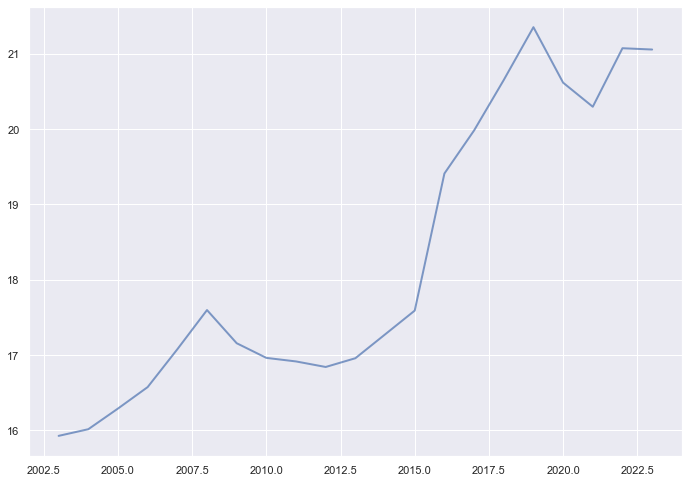

In [57]:
fig, ax = plt.subplots()
ax.plot(seasons, avgSeasonStats["AVGFGA3"], linewidth=2, alpha=0.7)
plt.show()